# Ttianic Survivor Dataset

In [1]:
import pandas as pd
import numpy as np

In [9]:
data_path = '../Data/Titanic/train.csv'

titanic = pd.read_csv(data_path, index_col = 0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Things to note.

* Age is not complete
* Cabin only has 200 datapoints
* Embarked is missing two datapoints
* Everything else is complete

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


For the survived column, 0 means the person died and 1 means they lived. As can be seen below, more people died than lived.

In [11]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* Age is incomplete
* Mean age is around 30 with most being between 20 and 38
* Describe says someone paid 0 for ticket. Interesthing thing to check on
* 0.42 is a very weird description of age, most would put down 1 or 6 months. Why is this 0.42?

In [12]:
titanic[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Mostly men aboard the Titanic

In [13]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Ticket doesn't seem to be a useful column here. Doesn't seem to be standardized in a usable way.

In [14]:
titanic['Ticket'].value_counts()

347082               7
1601                 7
CA. 2343             7
347088               6
CA 2144              6
3101295              6
S.O.C. 14879         5
382652               5
LINE                 4
PC 17757             4
17421                4
347077               4
W./C. 6608           4
4133                 4
2666                 4
113760               4
19950                4
113781               4
349909               4
110152               3
F.C.C. 13529         3
347742               3
13502                3
345773               3
35273                3
363291               3
110413               3
PC 17582             3
371110               3
239853               3
                    ..
349910               1
3101281              1
3101276              1
113788               1
113804               1
237798               1
C 17369              1
113787               1
13214                1
SOTON/OQ 3101316     1
STON/O 2. 3101285    1
A/5 21173            1
28424      

S = Southampton
C = Cherbourg
Q = Queenstown/Cobh

In [16]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Vast majority of passengers travelled alone.

Parch is describing the number of parents/children aboard the titanic.
SibSp is describing the number of siblings/spouses aboard.

In [17]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [18]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Things to note at this point.

* Age and Sex are very likely related to survival. 'Women and Children first.'
* Age isn't complete so something ust be done there
* Ticket seems completely useless
* Cabin isn't complete nor does it seem useful anyway
* Name isn't important but can extract title from Name, could be useful
* Look into maybe changing Age and Fare into a range rather than just a number. Check with and without to see if it helps

In [25]:
titanic[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [27]:
titanic[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [30]:
titanic[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


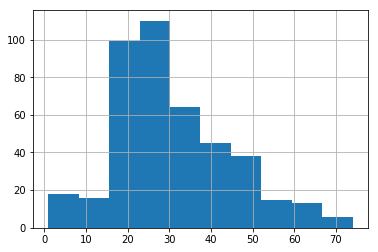

In [32]:
dead = titanic[titanic['Survived'] == 0]
dead['Age'].hist(bins = )